# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

In [2]:
# Surpress warnings:
import warnings


def warn(*args, **kwargs):
    pass


warnings.warn = warn

In [3]:
DATA_DIR = "data/"

In [4]:
mcamp_df = pd.read_csv(os.path.join(
    DATA_DIR, "marketing_campaign.csv"), delimiter="\t")

In [5]:
mcamp_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# EDA (Exploratory Data Analysis)

In [6]:
mcamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
mcamp_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
mcamp_df.describe(include="object")

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [9]:
mcamp_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
mcamp_df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
mcamp_df.iloc[1, :]

ID                           2174
Year_Birth                   1954
Education              Graduation
Marital_Status             Single
Income                    46344.0
Kidhome                         1
Teenhome                        1
Dt_Customer            08-03-2014
Recency                        38
MntWines                       11
MntFruits                       1
MntMeatProducts                 6
MntFishProducts                 2
MntSweetProducts                1
MntGoldProds                    6
NumDealsPurchases               2
NumWebPurchases                 1
NumCatalogPurchases             1
NumStorePurchases               2
NumWebVisitsMonth               5
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 1, dtype

In [12]:
mcamp_df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
mcamp_df[["Education", "ID"]].groupby("Education").count()

,ID
Education,
2n Cycle,203
Basic,54
Graduation,1127
Master,370
PhD,486


In [14]:
mcamp_df[["Marital_Status", "ID"]].groupby("Marital_Status").count()

,ID
Marital_Status,
Absurd,2
Alone,3
Divorced,232
Married,864
Single,480
Together,580
Widow,77
YOLO,2


# Preprocessing

In [15]:
mcamp_df = mcamp_df.dropna()
mcamp_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [16]:
macap_dropable_columns = [
    "ID",
    "Year_Birth",
    "Dt_Customer",
    "Z_CostContact",
    "Z_Revenue",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]

try:
    mcamp_df = mcamp_df.drop(macap_dropable_columns, axis=1)
except:
    pass

In [17]:
education_encoder = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 2,
    "Master": 3,
    "PhD": 4
}

marital_encoder = {
    "Absurd": 0,
    "Single": 0,
    "Yolo": 0,
    "Divorced": 1,
    "Widow": 1,
    "Together": 2,
    "Married": 2,
}

mcamp_df["Education"] = mcamp_df["Education"].map(education_encoder)
mcamp_df["Marital_Status"] = mcamp_df["Marital_Status"].map(marital_encoder)
mcamp_df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,2,0.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0
1,2,0.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0
2,2,2.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0
3,2,2.0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0
4,4,2.0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,2.0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0
2236,4,2.0,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0
2237,2,1.0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0
2238,3,2.0,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0


# Modeling

In [18]:
X = mcamp_df.values[:, :]
X = np.nan_to_num(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

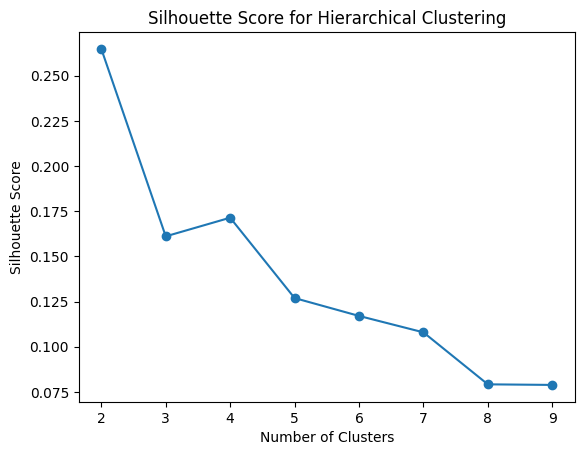

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Evaluate silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 10):  # Try different numbers of clusters
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
clusterNum = 3
hierarchical = AgglomerativeClustering(n_clusters=clusterNum)

labels = hierarchical.fit_predict(X)

mcamp_df["cluster"] = labels

print(mcamp_df)

      Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
0             2             0.0  58138.0        0         0       58   
1             2             0.0  46344.0        1         1       38   
2             2             2.0  71613.0        0         0       26   
3             2             2.0  26646.0        1         0       26   
4             4             2.0  58293.0        1         0       94   
...         ...             ...      ...      ...       ...      ...   
2235          2             2.0  61223.0        0         1       46   
2236          4             2.0  64014.0        2         1       56   
2237          2             1.0  56981.0        0         0       91   
2238          3             2.0  69245.0        0         1        8   
2239          4             2.0  52869.0        1         1       40   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546            

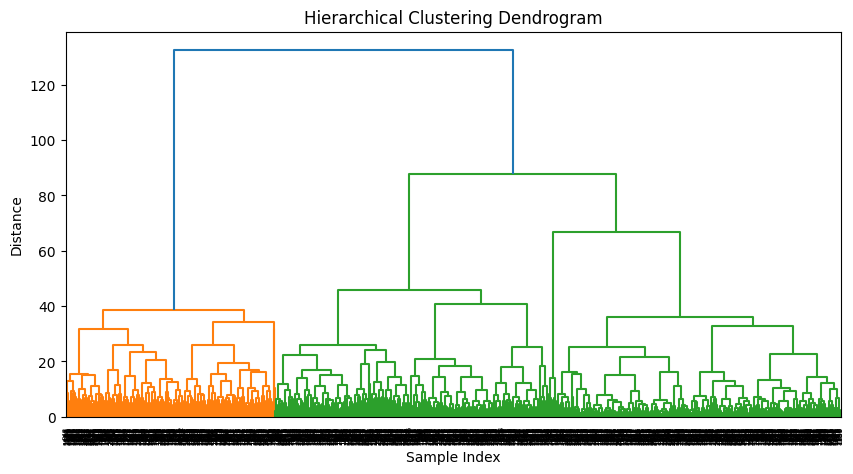

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

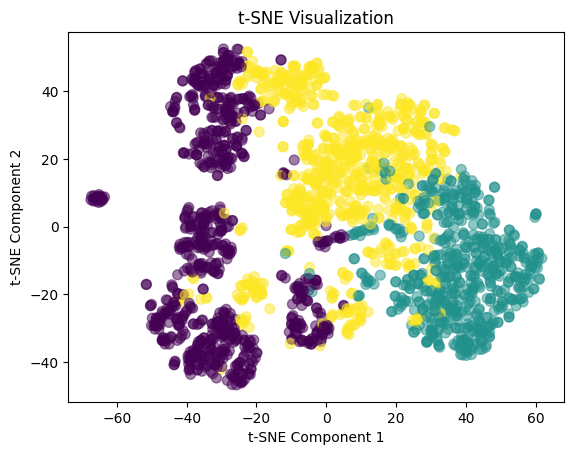

In [22]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
            cmap='viridis', s=50, alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [23]:
mcamp_df.groupby('cluster').mean()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
cluster,,,,,,,,,,,,,,,,,,
0,2.274910,1.312876,32295.264106,0.893157,0.384154,49.465786,31.534214,4.945978,21.537815,6.833133,4.864346,14.051621,1.971188,1.968788,0.463385,3.056423,6.661465,0.02521
1,2.414023,1.307179,75229.298831,0.031720,0.233723,49.998331,563.066778,69.779633,436.467446,97.611018,70.929883,77.619366,1.510851,5.183639,5.619366,8.539232,2.948247,0.00000
2,2.691327,1.656850,55887.250000,0.275510,0.841837,47.778061,398.645408,15.927296,115.660714,24.545918,17.036990,50.035714,3.318878,5.494898,2.764031,6.625000,5.704082,0.00000
